# 4 - Regressão Logística com Regularização

## Microchips Base

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt



DATA_BASE = "am-T1-dados"

def load_microchip_base(microchips_base=DATA_BASE):
    os.makedirs(microchips_base, exist_ok=True)
    txt_path = os.path.join(microchips_base, "ex2data2.txt")
    return np.loadtxt(txt_path, delimiter=",")

In [6]:

data = load_microchip_base()

values = data[:,:2]
clasz  = data[:,2]

pos = data[np.where(clasz == 0)]
neg = data[np.where(clasz == 1)]

## 4.1 - Visualização dos Dados

Text(0, 0.5, 'Microchip 2')

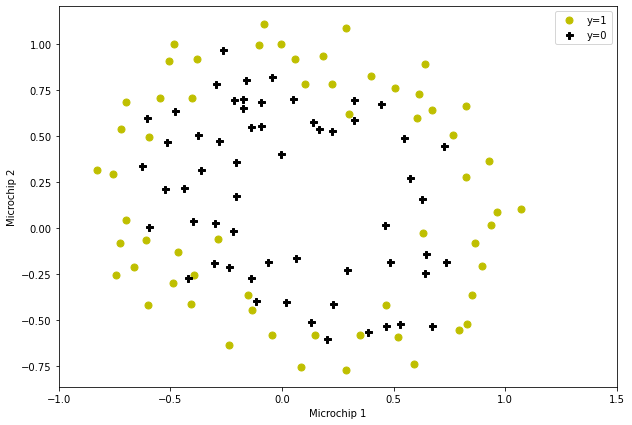

In [7]:
plt.figure(figsize=(10, 7))
plt.plot(pos[:,0], pos[:,1],'y.',marker='o',markersize=7, label="y=1");
plt.plot(neg[:,0], neg[:,1],'k.', marker='P',markersize=7, label="y=0");
plt.legend(loc=1)

plt.ylim = (-0.8, 1.5)
plt.xlim = (-1,1.8)
plt.xticks(np.arange(-1, 1.8,0.5))
plt.xlabel("Microchip 1", fontsize=10)
plt.ylabel("Microchip 2", rotation=90, fontsize=10)

## 4.2 - Mapeamento de características (feature mapping)

In [8]:
import numpy as np

def mapFeature(X1, X2):
    graus = 6
    out = np.ones(( X1.shape[0], sum(range(graus + 2)) ))
    curr_column = 1

    for i in range(1, graus + 1):
        for j in range(i+1):
            out[:,curr_column] = np.power(X1,i-j) * np.power(X2,j)
            curr_column += 1
    return out

## 4.3 - Função de custo e gradiente

In [9]:
import numpy as np
import sigmoide as si

def costFunctionReg(theta, exam_norm, y, lambda_reg):
    m = len(y) 

    custo = 0
    grad = np.zeros(theta.shape)

    term1 = y * np.transpose(np.log(sigmoide(np.dot(exam_norm,theta))))
    term2 = (1-y) * np.transpose(np.log( 1 - sigmoide( np.dot(exam_norm,theta))))
    regularizar = ( float(lambda_reg) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()
    custo = -(1./m)*(term1+term2).sum() + regularizar

    grad_no_regularization = (1./m) * np.dot(sigmoide( np.dot(exam_norm,theta) ).T - y, exam_norm).T
    grad_reg = (1./m) ** np.dot(sigmoide( np.dot(exam_norm,theta) ).T - y, exam_norm).T + ( float(lambda_reg) / m ) ** theta

    grad_reg[0] = grad[0]
    return custo 


In [11]:

import numpy as np
def sigmoide(z):
    return 1 / (1 + np.exp(-z)) 

In [12]:
microchips = load_microchip_base()

values = microchips[:,:2]
clasz  = microchips[:,2]

m = len(clasz)

values = mapFeature(values[:,0], values[:,1])
m,n = values.shape
initial_theta = np.zeros((n, 1))

lambda_r = 1
initial_theta = np.transpose(initial_theta)
custo = costFunctionReg(np.transpose(initial_theta), values,clasz,lambda_r)
custo

0.6931471805599454

## 4.4 Esboço da fronteira de decisão

In [24]:
import mapFeature as mf
import plot_data as pd


# 4.4 Esbo¸co da fronteira de decis˜ao


import matplotlib.pyplot as plt
import numpy as np


def plotData(microchip_base, clasz):
    pos = np.where(clasz==1)
    neg = np.where(clasz==0)
    
    p1 = plt.plot(microchip_base[pos,0], microchip_base[pos,1], marker='+', markersize=9, color='k')[0]
    p2 = plt.plot(microchip_base[neg,0], microchip_base[neg,1], marker='o', markersize=7, color='y')[0]
    return plt, p1, p2
    

def plotDecisionBoundary(theta, microchip_base , clasz):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(figsize=(10, 7))

    plt, p1, p2 = plotData(microchip_base[:,1:3], clasz)
   
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros(( len(u), len(v) ))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapFeature(np.array([u[i]]), np.array([v[j]])),theta)
   
    z = np.transpose(z) 


    print(f'features = {mapFeature(np.array([u[1]]), np.array([v[1]])).shape}')

    p3 = plt.contour(u, v, z, levels=[0], linewidth=2).collections[0]
    
    plt.legend((p1,p2, p3),('y = 1', 'y = 0', 'Fronteira de Decisão'), numpoints=1, handlelength=0)

In [26]:
from scipy.optimize import fmin_bfgs

initial_theta = np.zeros((n, 1))
myargs=(values, clasz, lambda_r)
theta = fmin_bfgs(costFunctionReg, x0=initial_theta, args=myargs)
theta

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1392
         Gradient evaluations: 48


array([ 1.27268731,  0.62557016,  1.18096642, -2.01919836, -0.91761468,
       -1.43194141,  0.12375927, -0.36513135, -0.35703385, -0.17485795,
       -1.45843784, -0.05129675, -0.61603955, -0.27464162, -1.19282571,
       -0.24270351, -0.20570032, -0.04499762, -0.27782709, -0.29525848,
       -0.45613312, -1.04377863,  0.02762806, -0.29265641,  0.01543378,
       -0.32759338, -0.14389228, -0.9246013 ])

In [49]:
values.shape

(118, 28)

features = (1, 28)


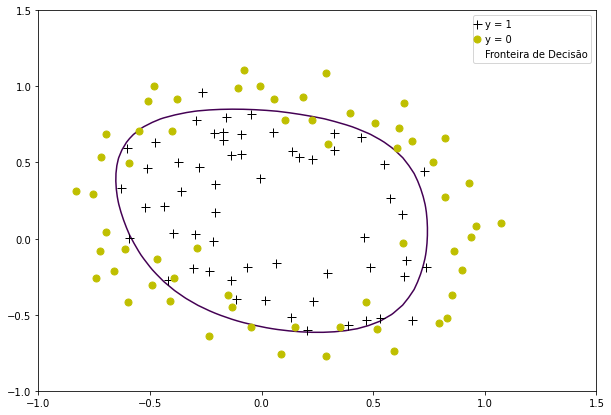

In [25]:
plotDecisionBoundary(theta,values,clasz)

In [ ]:
from sklearn.pipeline import Pipeline


Pipeline([])
